In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from preprocess import preprocessing
#from read_mias import *
import config
from object_detector import ObjectDetector
from custom_tensor_dataset import CustomTensorDataset
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.nn import CrossEntropyLoss
from torch.nn import MSELoss
from torch.optim import Adam
from torchvision.models import resnet50
from sklearn.model_selection import train_test_split
from imutils import paths
import pickle
import torch

import torchvision
from torchvision import transforms, datasets, models
import torch
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [6]:
from generate_target import generate_target_fixed
from plotting import plot_image
from torchvision import transforms

img, target = generate_target_fixed(3, 'mias_info/labels.txt')

if target['boxes'].shape[0] > 0:
    img_tensor = transforms.ToTensor()(img)
    plot_image(img_tensor, target)
else:
    print("No boxes found")


[ERROR] NaN found in box calculation for image 3. Skipping.
No boxes found


In [ ]:
import os
os.getcwd()

import os

print("Current Directory:", os.getcwd())
print("Files:", os.listdir())
print("Mias Info Files:", os.listdir('mias_info'))


Current Directory: c:\Users\niroo\bioe486_project
Files: ['.git', 'config.py', 'custom_tensor_dataset.py', 'demo.ipynb', 'generate_target.py', 'mias', 'mias_data', 'mias_info', 'object_detector.py', 'plotting.py', 'preprocess.py', 'requirements.txt', 'target.ipynb', 'train_det.py', 'venv', '__pycache__']
Mias Info Files: ['Info.txt', 'labels.txt', 'Licence.txt', 'README']


[FOUND] Image 0 has 1 boxes


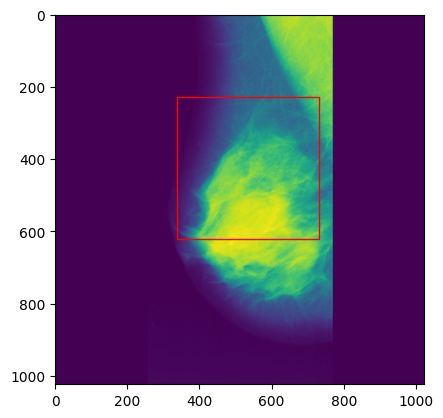

[FOUND] Image 1 has 1 boxes


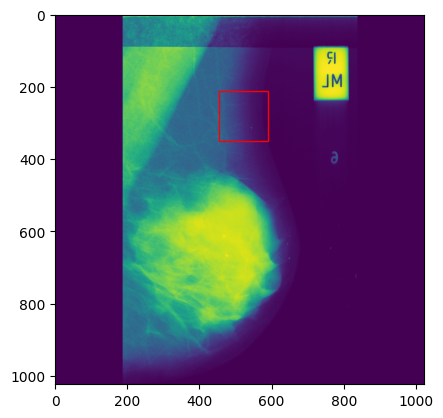

[ERROR] NaN found in box calculation for image 2. Skipping.
[EMPTY] Image 2 has NO boxes
[ERROR] NaN found in box calculation for image 3. Skipping.
[EMPTY] Image 3 has NO boxes
[FOUND] Image 4 has 2 boxes


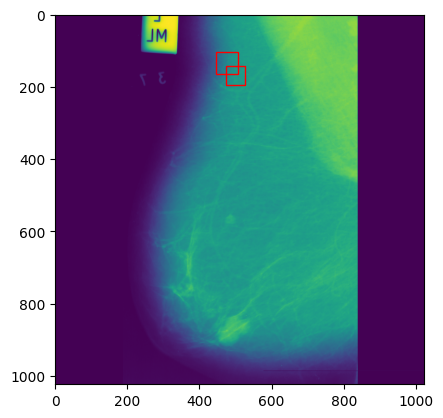

[ERROR] NaN found in box calculation for image 5. Skipping.
[EMPTY] Image 5 has NO boxes
[ERROR] NaN found in box calculation for image 6. Skipping.
[EMPTY] Image 6 has NO boxes
[ERROR] NaN found in box calculation for image 7. Skipping.
[EMPTY] Image 7 has NO boxes
[ERROR] NaN found in box calculation for image 8. Skipping.
[EMPTY] Image 8 has NO boxes
[FOUND] Image 9 has 1 boxes


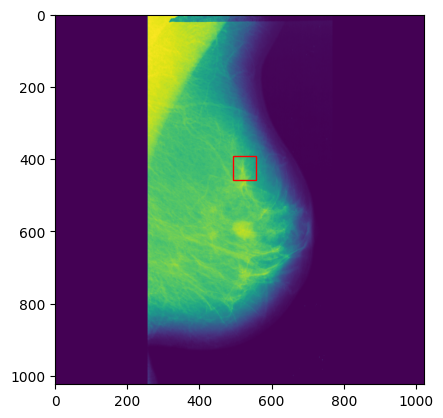

In [ ]:
from generate_target import generate_target_fixed
from plotting import plot_image
from torchvision import transforms

for idx in range(10):
    img, target = generate_target_fixed(idx, 'mias_info/labels.txt')
    if target['boxes'].shape[0] > 0:
        print(f"[FOUND] Image {idx} has {target['boxes'].shape[0]} boxes")
        img_tensor = transforms.ToTensor()(img)
        plot_image(img_tensor, target)
    else:
        print(f"[EMPTY] Image {idx} has NO boxes")


In [14]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 3  # background + 2 (Benign, Malignant) or adjust as per your labels
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torch.nn.Linear(in_features, num_classes)

model = model.to(config.DEVICE)


c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn


In [25]:
from generate_target import generate_target_fixed

class FilteredTensorDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.valid_ids = []
        self.transforms = transforms.ToTensor()
        for idx in range(100):
            img, target = generate_target_fixed(idx, 'mias_info/labels.txt')
            if target['boxes'].shape[0] > 0:
                self.valid_ids.append(idx)

    def __getitem__(self, index):
        img, target = generate_target_fixed(self.valid_ids[index], 'mias_info/labels.txt')
        img = self.transforms(img)
        return img, target

    def __len__(self):
        return len(self.valid_ids)


In [26]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_ds = FilteredTensorDataset()
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True, collate_fn=collate_fn)

# Check one batch
imgs, targets = next(iter(train_loader))
print(f"Batch size: {len(imgs)}")
print(f"Image shape: {imgs[0].shape}")
print(f"Target example: {targets[0]}")


[ERROR] NaN found in box calculation for image 2. Skipping.
[ERROR] NaN found in box calculation for image 3. Skipping.
[ERROR] NaN found in box calculation for image 5. Skipping.
[ERROR] NaN found in box calculation for image 6. Skipping.
[ERROR] NaN found in box calculation for image 7. Skipping.
[ERROR] NaN found in box calculation for image 8. Skipping.
[ERROR] NaN found in box calculation for image 10. Skipping.
[ERROR] NaN found in box calculation for image 13. Skipping.
[ERROR] NaN found in box calculation for image 15. Skipping.
[ERROR] NaN found in box calculation for image 17. Skipping.
[ERROR] NaN found in box calculation for image 19. Skipping.
[ERROR] NaN found in box calculation for image 21. Skipping.
[ERROR] NaN found in box calculation for image 23. Skipping.
[ERROR] NaN found in box calculation for image 25. Skipping.
[ERROR] NaN found in box calculation for image 26. Skipping.
[ERROR] NaN found in box calculation for image 28. Skipping.
[ERROR] NaN found in box calcu

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 3  # background + 2 (B, M) — adjust as per your use case
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torch.nn.Linear(in_features, num_classes)
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = fasterrcnn_resnet50_fpn(pretrained=True)

num_classes = 3

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model = model.to(device)


c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch

optimizer = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.9, weight_decay=0.0005)

num_epochs = 20  

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    valid_batches = 0

    for imgs, targets in train_loader:
        if all([t['boxes'].shape[0] == 0 for t in targets]):
            print("[INFO] Skipping batch with no boxes")
            continue

        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(imgs, targets)
        losses = sum(loss for loss in loss_dict.values())

        if torch.isnan(losses):
            print("[WARNING] NaN detected in loss, skipping this batch.")
            continue

        optimizer.zero_grad()
        losses.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10) 
        optimizer.step()

        epoch_loss += losses.item()
        valid_batches += 1

    if valid_batches > 0:
        avg_loss = epoch_loss / valid_batches
        print(f"[EPOCH {epoch+1}] Avg Loss: {avg_loss:.4f}")
    else:
        print(f"[EPOCH {epoch+1}] No valid batches.")


[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[EPOCH 1] No valid batches.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping this batch.
[EPOCH 2] No valid batches.
[WARNING] NaN detected in loss, skipping this batch.
[WARNING] NaN detected in loss, skipping th

In [37]:
img, target = generate_target_fixed(4, 'mias_info/labels.txt')


Predicted boxes: tensor([], size=(0, 4))
Predicted labels: tensor([], dtype=torch.int64)
Predicted scores: tensor([])


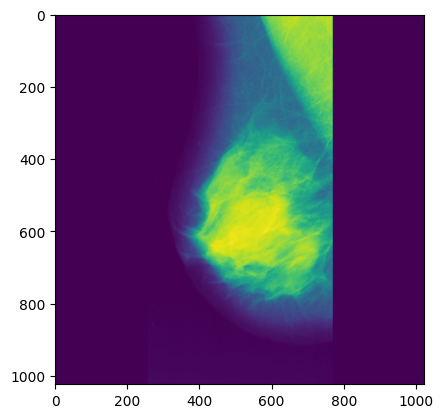

In [ ]:
from plotting import plot_image
from torchvision.transforms.functional import to_pil_image

model.eval()
with torch.no_grad():
    img, target = train_ds[0]
    img_gpu = img.to(device)
    prediction = model([img_gpu])[0]

    print(f"Predicted boxes: {prediction['boxes']}")
    print(f"Predicted labels: {prediction['labels']}")
    print(f"Predicted scores: {prediction['scores']}")

    img_cpu = img.cpu()
    plot_image(img_cpu, prediction)


[Image 0] Predicted boxes: tensor([], size=(0, 4))
[Image 0] Predicted labels: tensor([], dtype=torch.int64)
[Image 0] Predicted scores: tensor([])


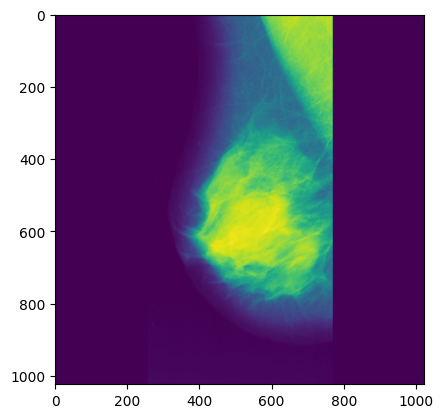

[Image 1] Predicted boxes: tensor([], size=(0, 4))
[Image 1] Predicted labels: tensor([], dtype=torch.int64)
[Image 1] Predicted scores: tensor([])


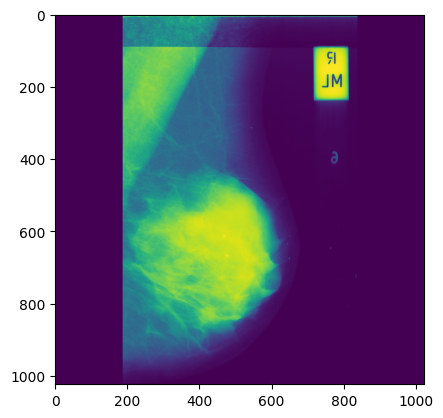

[Image 2] Predicted boxes: tensor([], size=(0, 4))
[Image 2] Predicted labels: tensor([], dtype=torch.int64)
[Image 2] Predicted scores: tensor([])


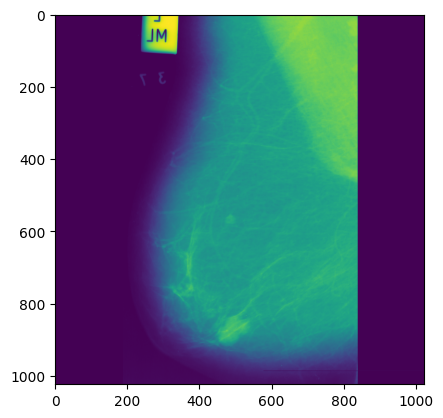

[Image 3] Predicted boxes: tensor([], size=(0, 4))
[Image 3] Predicted labels: tensor([], dtype=torch.int64)
[Image 3] Predicted scores: tensor([])


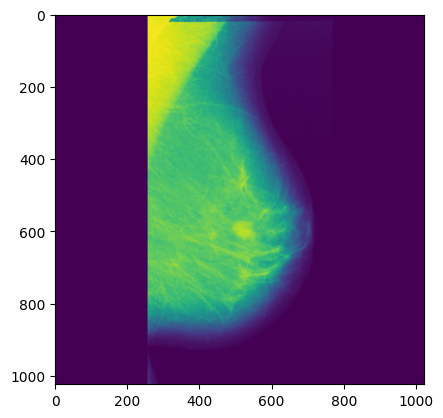

[Image 4] Predicted boxes: tensor([], size=(0, 4))
[Image 4] Predicted labels: tensor([], dtype=torch.int64)
[Image 4] Predicted scores: tensor([])


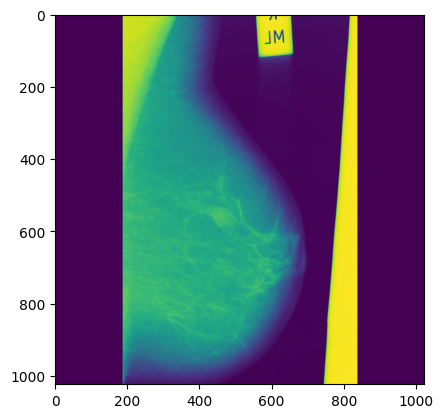

In [ ]:
from plotting import plot_image
from torchvision.transforms.functional import to_pil_image

model.eval()
threshold = 0.1  

with torch.no_grad():
    for idx in range(5):  
        img, target = train_ds[idx]
        img_gpu = img.to(device)
        prediction = model([img_gpu])[0]

        keep = prediction['scores'] > threshold
        filtered_prediction = {
            'boxes': prediction['boxes'][keep],
            'labels': prediction['labels'][keep],
            'scores': prediction['scores'][keep]
        }

        print(f"[Image {idx}] Predicted boxes: {filtered_prediction['boxes']}")
        print(f"[Image {idx}] Predicted labels: {filtered_prediction['labels']}")
        print(f"[Image {idx}] Predicted scores: {filtered_prediction['scores']}")

        # Plot
        img_cpu = img.cpu()
        plot_image(img_cpu, filtered_prediction)


##next


In [ ]:
from PIL import Image

def generate_roi_patch(image_id, annotation_file):
    img, target = generate_target_fixed(image_id, annotation_file)
    
    if target['boxes'].shape[0] == 0:
        img_cropped = img
        label = 0  
    else:
        box = target['boxes'][0]
        w, h = img.size
        xmin = int(box[0] * w)
        ymin = int(box[1] * h)
        xmax = int(box[2] * w)
        ymax = int(box[3] * h)

        img_cropped = img.crop((xmin, ymin, xmax, ymax))
        label = target['labels'][0].item()

    return img_cropped, label


In [ ]:
class ROIPatchDataset(torch.utils.data.Dataset):
    def __init__(self, num_images=100, transform=None):
        self.image_ids = []
        self.transform = transform

        for idx in range(num_images):
            img, target = generate_target_fixed(idx, 'mias_info/labels.txt')
            if target['boxes'].shape[0] > 0:
                self.image_ids.append(idx)

    def __getitem__(self, index):
        img, label = generate_roi_patch(self.image_ids[index], 'mias_info/labels.txt')
        img = img.convert('RGB')  
        if self.transform:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.image_ids)


In [53]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = ROIPatchDataset(transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)


[ERROR] NaN found in box calculation for image 2. Skipping.
[ERROR] NaN found in box calculation for image 3. Skipping.
[ERROR] NaN found in box calculation for image 5. Skipping.
[ERROR] NaN found in box calculation for image 6. Skipping.
[ERROR] NaN found in box calculation for image 7. Skipping.
[ERROR] NaN found in box calculation for image 8. Skipping.
[ERROR] NaN found in box calculation for image 10. Skipping.
[ERROR] NaN found in box calculation for image 13. Skipping.
[ERROR] NaN found in box calculation for image 15. Skipping.
[ERROR] NaN found in box calculation for image 17. Skipping.
[ERROR] NaN found in box calculation for image 19. Skipping.
[ERROR] NaN found in box calculation for image 21. Skipping.
[ERROR] NaN found in box calculation for image 23. Skipping.
[ERROR] NaN found in box calculation for image 25. Skipping.
[ERROR] NaN found in box calculation for image 26. Skipping.
[ERROR] NaN found in box calculation for image 28. Skipping.
[ERROR] NaN found in box calcu

In [ ]:
from torchvision import models

model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 3)  
model = model.to(device)


c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\niroo\bioe486_project\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [55]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [57]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(30):
    model.train()
    total_loss = 0
    correct = 0

    for imgs, labels in loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()

    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}, Accuracy: {correct / len(dataset):.4f}")


[Epoch 1] Loss: 0.1890, Accuracy: 0.9655
[Epoch 2] Loss: 0.1020, Accuracy: 1.0000
[Epoch 3] Loss: 0.0306, Accuracy: 1.0000
[Epoch 4] Loss: 0.0427, Accuracy: 1.0000
[Epoch 5] Loss: 0.0507, Accuracy: 1.0000
[Epoch 6] Loss: 0.0411, Accuracy: 1.0000
[Epoch 7] Loss: 0.0211, Accuracy: 1.0000
[Epoch 8] Loss: 0.0146, Accuracy: 1.0000
[Epoch 9] Loss: 0.0132, Accuracy: 1.0000
[Epoch 10] Loss: 0.0129, Accuracy: 1.0000
[Epoch 11] Loss: 0.0052, Accuracy: 1.0000
[Epoch 12] Loss: 0.0514, Accuracy: 1.0000
[Epoch 13] Loss: 0.0243, Accuracy: 1.0000
[Epoch 14] Loss: 0.0052, Accuracy: 1.0000
[Epoch 15] Loss: 0.0030, Accuracy: 1.0000
[Epoch 16] Loss: 0.0023, Accuracy: 1.0000
[Epoch 17] Loss: 0.0210, Accuracy: 1.0000
[Epoch 18] Loss: 0.0022, Accuracy: 1.0000
[Epoch 19] Loss: 0.0105, Accuracy: 1.0000
[Epoch 20] Loss: 0.0021, Accuracy: 1.0000
[Epoch 21] Loss: 0.0017, Accuracy: 1.0000
[Epoch 22] Loss: 0.0020, Accuracy: 1.0000
[Epoch 23] Loss: 0.0025, Accuracy: 1.0000
[Epoch 24] Loss: 0.0484, Accuracy: 1.0000
[

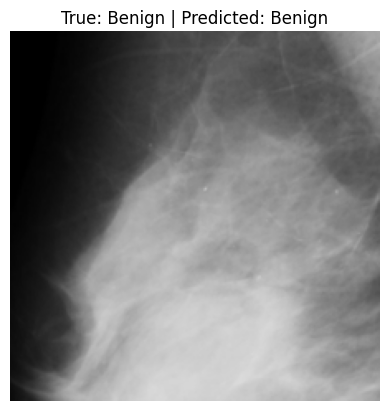

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

class_names = ['Normal', 'Benign', 'Malignant']

model.eval()
with torch.no_grad():
    img, label = dataset[0]
    img_gpu = img.to(device).unsqueeze(0)
    output = model(img_gpu)
    pred_label = output.argmax(1).item()

    img_show = img.cpu()
    img_show = to_pil_image(img_show)

    plt.imshow(img_show, cmap='gray')
    plt.title(f"True: {class_names[label]} | Predicted: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()


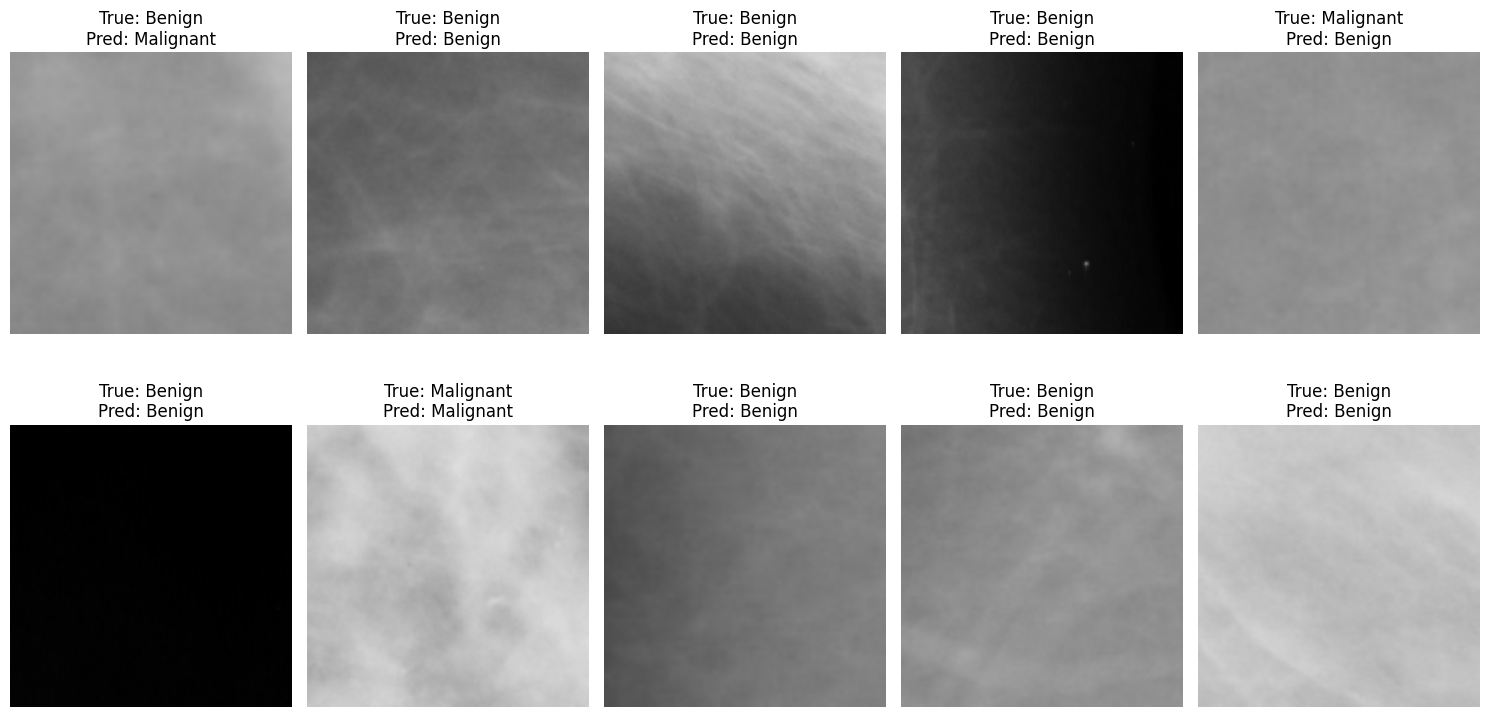

In [ ]:
import matplotlib.pyplot as plt
import random
from torchvision.transforms.functional import to_pil_image

class_names = ['Normal', 'Benign', 'Malignant']

model.eval()

num_samples = 10
indices = random.sample(range(len(dataset)), num_samples)

plt.figure(figsize=(15, 8))

with torch.no_grad():
    for i, idx in enumerate(indices):
        img, label = dataset[idx]
        img_gpu = img.to(device).unsqueeze(0)
        output = model(img_gpu)
        pred_label = output.argmax(1).item()

        img_cpu = img.cpu()
        img_pil = to_pil_image(img_cpu)

        plt.subplot(2, 5, i+1)
        plt.imshow(img_pil, cmap='gray')
        plt.title(f"True: {class_names[label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for img, label in dataset:
        img_gpu = img.to(device).unsqueeze(0)
        output = model(img_gpu)
        pred_label = output.argmax(1).item()

        all_preds.append(pred_label)
        all_labels.append(label)

import numpy as np
unique_labels = np.unique(all_labels)
print(f"Unique labels in dataset: {unique_labels}")

print(classification_report(all_labels, all_preds, labels=unique_labels, target_names=[class_names[i] for i in unique_labels]))


Unique labels in dataset: [1 2]
              precision    recall  f1-score   support

      Benign       0.91      0.95      0.93        21
   Malignant       0.86      0.75      0.80         8

    accuracy                           0.90        29
   macro avg       0.88      0.85      0.87        29
weighted avg       0.89      0.90      0.89        29

